In [40]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 46.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv("./Datasets/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Clean and Split (Train and Test)

In [12]:
df.drop(columns = 'Unnamed: 0', inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
X = df.drop(columns = 'Sales')
Y = df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=4, test_size=0.3)
X_train.shape, X_test.shape


((140, 3), (60, 3))

## Train OR Fit the model

In [14]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Output (Coefficients and Intercept)

In [16]:
lr.coef_

array([0.04533392, 0.17715767, 0.00553852])

In [17]:
lr.intercept_

np.float64(3.0906443641251116)

## Predict For Test Data

In [18]:
Y_pred_test = lr.predict(X_test)

## Evaluation of Linear Regression

In [21]:
# Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error
# R2 Score
# We need Y_true  Y_pred

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error , r2_score
print(f"MAE is {mean_absolute_error(Y_test, Y_pred_test)}")
print(f"MSE is {mean_squared_error(Y_test, Y_pred_test)}")
print(f"RMSE is {root_mean_squared_error(Y_test, Y_pred_test)}")

MAE is 1.2111525124980485
MSE is 2.2237746679115573
RMSE is 1.4912326002041256


In [22]:
# R2 Score:
# How much variance(information) can be explained by using the given features
# If you can predict complete Y with X, we will have 1 which is 100% => Exactly on the regression line
# Accuracy is where given features give how near are the prediction to regression line
print(f"R2-score is {r2_score(Y_test, Y_pred_test)}")

R2-score is 0.9127220729596172


## Regularization & Assumptions of LR

In [25]:
# Lasso Regression (L1)
# L = min(squared Error Loss) + lambda * || b||*
# 	 Tends to make predictions to Abs Zero
# 	 Because we are adding Abs Value of Magnitude of coefficient as penalty term to loss function
# Prevents Overfitting
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, Y_train)
Y_pred_test = las.predict(X_test)
print(f"R2-score is {r2_score(Y_test, Y_pred_test)}")

R2-score is 0.9112250903194143


In [27]:
# Ridge Regression (L2)
# Result in Never sets the value of coefficients to Abs Zero
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, Y_train)
Y_pred_test = ridge.predict(X_test)
print(f"R2-score is {r2_score(Y_test, Y_pred_test)}")

R2-score is 0.9127183051915455


In [45]:
# Elastic Regression (L1 + L2)
# Result in How much L1 and How much L2 we should Apply
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train, Y_train)
Y_pred_test = elastic.predict(X_test)
print(f"R2-score is {r2_score(Y_test, Y_pred_test)}")

R2-score is 0.9117469302155122


In [46]:
# Assumptions of LR
# Our Training Data Should Follow the assumption of Algorithm
# Assum1: Linear Relationship between feature and Target , => Pairplot or graphs can help
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


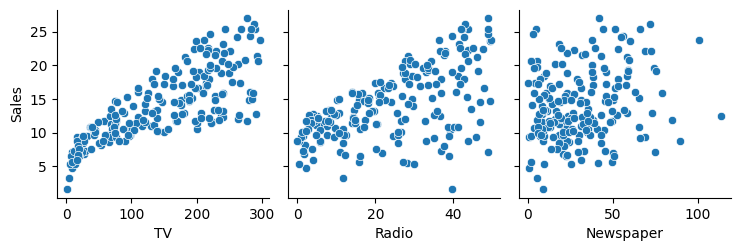

In [47]:
import seaborn as sns
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'])
plt.show()
# Newspaper has little linear relation with Sales compared to TV and Radio

In [48]:
corr = df.corr()
corr
# Check correlation of TV, Radio, Newspaper with Sales ignore rest

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [49]:
# Assum2: Mean Residuals (Given Dataset) = 0 
residual = (Y_test - Y_pred_test)
np.mean(residual)

np.float64(-0.07559702903921775)

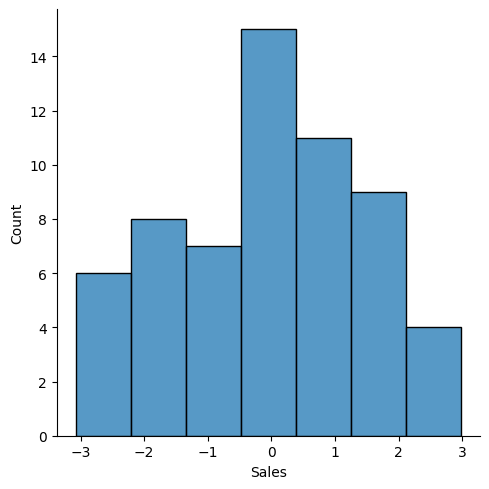

In [50]:
# Assum3: Normal Distribution of Error Terms
sns.displot(residual)
plt.show()

In [52]:
# Assum4: Multi Collinearity => vif (Variance Inflation Factor)
# Check if we have correlation between features
# If we have Collinearity, Ability to generate prediction reduces Hmm..! Why and Cool
# Because model gets confused like which factor is influencing the target

# VIF_SCORE > 4 --> Multicollinearity in the Dataset
# VIF_SCORE < 4 --> No Multicollinearity in the Dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_score(x):
    x_arr = x.values
    vif = [variance_inflation_factor(x_arr,i) for i in range(X.shape[1]) ]
    vif_score = pd.DataFrame()
    vif_score['vif_score'] = vif
    vif_score['Features'] = X.columns
    return vif_score
vif_score(X_train)


,vif_score,Features
0,2.583582,TV
1,3.192295,Radio
2,3.194723,Newspaper
